## <a name="0.0"></a>Содержание (кликабельное):
* [0. Описание проекта, описание данных, импорт библиотек](#0.)
* [1. Ознакомление с данными:](#1.)
     - [1.1. Общая информация о датафрейме](#1.1.)
     - [1.2. В каких столбцах меняем типы данных](#1.2.)
     - [1.3. Информация о пропусках, методы их заполнения](#1.3.)
* [2. Подготовка данных:](#2.)
     - [2.1. Приведение названий столбцов к нижнему регистру](#2.1.)
     - [2.2. Изменение типа данных по столбцу user_score](#2.2.)
     - [2.3. Обработка пропусков](#2.3.)     
     - [2.4. Отдельный столбец с суммой продаж по всем регионам 'sales_total'](#2.4.)
* [3. Подготовка данных:](#3.)
     - [3.1. Функция для прорисовки bar-графиков create_any_bar](#3.1.)
     - [3.2. Количество выпущенных игр по годам](#3.2.)
     - [3.3. Количество выпущенных игр по платформам.](#3.3.)     
     - [3.4. Динамика продаж игр по платформам](#3.4.)
       + [3.4.1. Функция для прорисовки графиков line create_any_lines](#3.4.1.)
       + [3.4.2. График динамики продаж по годам по каждой платформе](#3.4.2.)
       + [3.4.3. График динамики продаж по годам по топ-6 платформ](#3.4.3.)
     - [3.5. Динамика продаж игр в наше время](#3.5.)
     - [3.6. Boxplot по глобальным продажам игр и с разбивкой по платформам](#3.6.)     
       + [3.6.1. Функция для прорисовки boxplot create_any_sales_boxplot](#3.6.1.)
       + [3.6.2. Boxplot по глобальным продажам игр](#3.6.2.)
       + [3.6.3. Boxplot по наиболее популярным на конец 2016 года платформам](#3.6.3.)     
     - [3.7. Влияние отзывов пользователей и критиков на продажи](#3.7.)     
       + [3.7.1. Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков](#3.7.1.)
       + [3.7.2. Матрица корреляции](#3.7.2.)     
       + [3.7.3. Данные по корреляции по топовым платформам](#3.7.3.)         
     - [3.8. Распределение игр по жанрам](#3.8.)     
* [4. Портрет пользователя регионов NA, EU, JP:](#4.)
     - [4.1. Функция для прорисовки графиков top_in_regions_plot](#4.1.)
     - [4.2. Определение самых популярных платформ в заданных регионах](#4.2.)
     - [4.3. Определение самых популярных жанров в заданных регионах](#4.3.)      
     - [4.4. Влияние рейтинга ESRB на продажи в отдельном регионе](#4.4.) 
* [5. Проверка гипотез:](#5.)
     - [5.1. Гипотеза № 1 (о равенстве средних пользовательских рейтингов на XBox One и PC)](#5.1.)
     - [5.2. Гипотеза № 2 (о равенстве средних пользовательских рейтингов жанров Action и Sports)](#5.2.)
* [6. Общий вывод](#6.)

## Описание проекта<a name="0."></a>
<font size="2">([к содержанию](#0.0))</font>

Вы работаете в интернет-магазине <b>«Стримчик»</b>, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, <b>Xbox</b> или <b>PlayStation</b>). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br/><br/>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br/><br/>
В наборе данных попадается аббревиатура <b>ESRB (Entertainment Software Rating Board)</b> — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <b>ESRB</b> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

## Описание данных

* <b>Name</b> — название игры
* <b>Platform</b> — платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)
* <b>EU_sales</b> — продажи в Европе (миллионы долларов)
* <b>JP_sales</b> — продажи в Японии (миллионы долларов)
* <b>Other_sales</b> — продажи в других странах (миллионы долларов)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<b>Импортируем библиотеки:</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

<b>Примечание:</b><br/>
Прошу учесть, что функционал <b>Matplotlib</b> немного дефективен по части работы %matplotlib notebook, по этой причине анимированные графики (с отображением принадлежности линий; п.3.4.2, 3.4.3, 3.5) работают только если запускать ячейки от одной к другой, а не сразу все. При запуске каждого следующего графика предыдущий превращается в статичную картинку.

<br/><a name="1."></a>
## 1. Ознакомление с данными
<font size="2">([к содержанию](#0.0))</font>

Загружаем данные:

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

В первых 10 строках уже немало пропусков - не очень хороший знак.<br/>
Посмотрим общую информацию о датафрейме:

<br/><a name="1.1."></a>
<b>1.1. Общая информация о датафрейме.</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропусков много. Посмотрим их подробнее чуть ниже.

<br/><a name="1.2."></a>
<b>1.2. В каких столбцах меняем типы данных.</b><br/>
<font size="2">([к содержанию](#0.0))</font>
* <b>user_score</b> - это же численный показатель, а имеет тип <b>object</b> - меняем на <b>'float'</b>.
<br/>
Остальные типы столбцов в порядке.

<br/><a name="1.3."></a>
<b>1.3. Информация о пропусках, методы их заполнения.</b><br/>
<font size="2">([к содержанию](#0.0))</font>

Визуализируем картину, чтоб понять объем бедствия по пропускам:

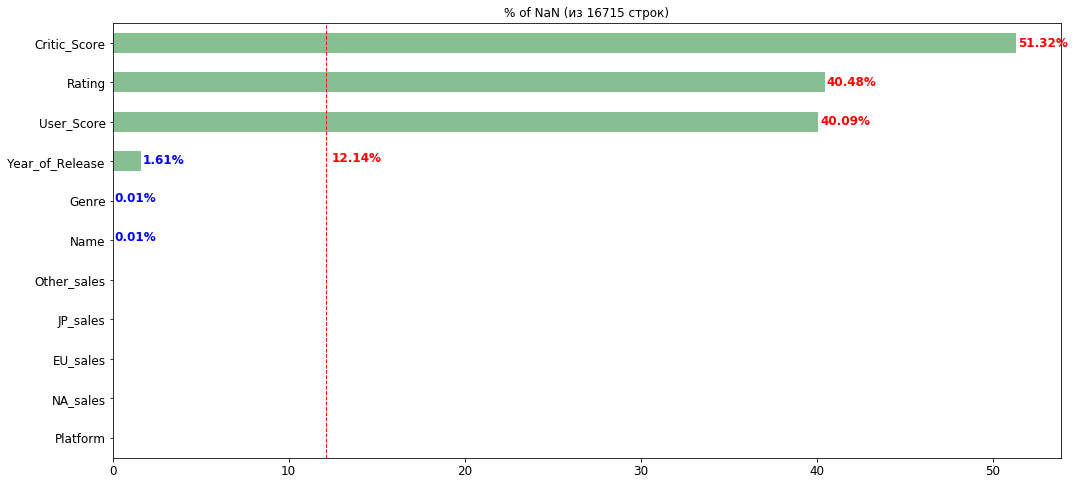

In [5]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из {} строк)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(games)

Практически половина данных отсутствует по столбцам <b>critic_score</b>, <b>rating</b> и <b>user_score</b>. Такая важная описательная характеристика данных как среднее значение количества пропусков в столбце равна 12%.<br/><br/>
Как поступим:
* <b>critic_score</b> - <b>оценка критиков </b> - вполне возможно, что игры не оценивались критиками, т.к. тогда не было такого "обычая". Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);
* <b>rating</b> - <b>рейтинг от  ESRB</b> - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Здесь то же самое. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "No ESRB";<br/>
* <b>user_score</b> - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом <b>critic_score</b>.<br/>

Столбец <b>year_of_release</b> (год выпуска игры) имеет 1,6% пропусков. Не много, но неприятно. Средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных, да и пропусков в столбце не так много. Другими словами, целых данных достаточно для анализа, поэтому оставляем как есть.

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "нереальными" данными для возможности спокойно работать с этими строками по другим параметрам.

Всё-таки проверим, преимущественно ли по старым играм есть эти пропуски:

In [6]:
games.query('Critic_Score.isnull() & Rating.isnull() & User_Score.isnull()')

Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6621 rows x 11 columns]

Предположение неверно. И по довольно новым играм есть такие пропуски.

<hr style="border: 1px solid #000;"> 


## 2. Подготовка данных<a name="2."></a>
<font size="2">([к содержанию](#0.0))</font>

<br/><a name="2.1."></a>
<b>2.1. Для удобства работы приведем названия столбцов к нижнему регистру:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [7]:
games.columns = games.columns.str.lower()

<br/><a name="2.2."></a>
<b>2.2. Изменение типа данных по столбцу user_score</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим отдельно столбцы <b>user_score</b> - его формат <b>'object</b>, что очень странно, ведь если бы там были только числа и NaN'ы, то формат был бы <b>'float'</b>:

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, видим <b>"tbd"</b>. Посмотрим, сколько их там таких:

In [9]:
games[games['user_score'] == 'tbd']

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

2500 строк с таким значением.<br/><br/> 
Почитав FAQ Metacritic'a, найдем, что это аббревиатура от <b>To Be Determined</b>. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.<br/>
Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие приоисхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как <b>Metacritic</b>. Как пример можно привести японские игры и их аудитораю - вряд ли много японских игроков заходят на <b>Metacritic</b>, чтобы написать отзыв на языке, которым они практически не владеют. Они оценивают свои игры на популярных у себя ресурсах.

Но числовой тип столбца нам необходим. Т.к. <b>'tbd'</b> фактически и является NaN, заменим и NaN, и <b>'tbd'</b> на значение -1 и приведем значение столбца к числовому:

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

<br/><a name="2.3."></a>
<b>2.3. Обработка пропусков</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

У нас к обработке столбцы <b>critic_score</b> и <b>user_score</b> - заполним пропуски значением -1.

In [11]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [12]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


Посмотрим ещё раз на статистику по пропускам:

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0de18958d0>, 3.828181818181818)

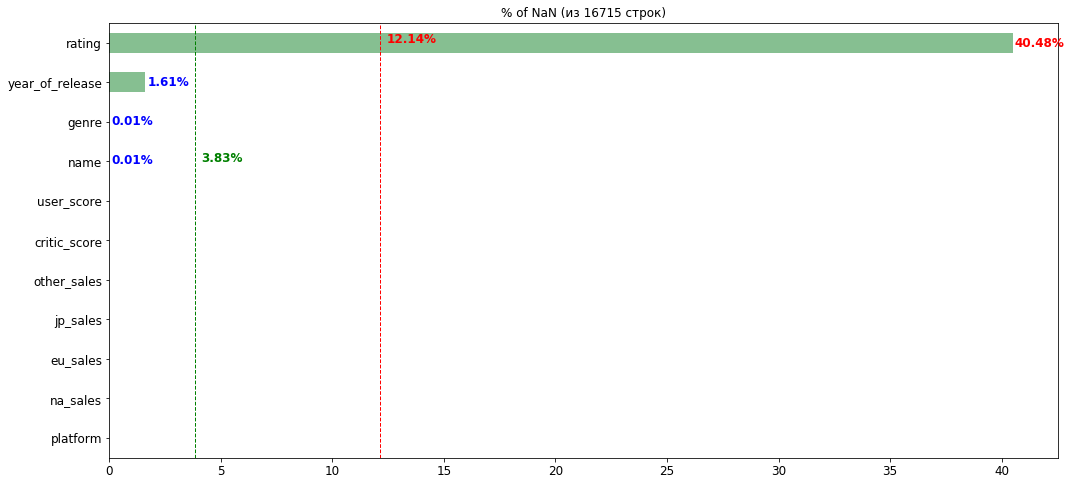

In [13]:
percent_hbar(games, threshold)

Другое дело - средний процент незаполненности данных равен 3,8%.

<br/><a name="2.4."></a>
<b>2.4. Отдельный столбец с суммой продаж по всем регионам 'sales_total'</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

In [14]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<hr style="border: 1px solid #000;">

<br/><a name="3."></a>
## 3. Исследовательский анализ данных<a name="2."></a>
<font size="2">([к содержанию](#0.0))</font>

<br/><a name="3.1."></a>
<b>3.1. Функция для прорисовки bar-графиков create_any_bar</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

Т.к. далее нам придется рисовать не одну диаграмму, напишем под это функцию:

In [15]:
def create_any_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')

<br/><a name="3.2."></a>
<b>3.2. Количество выпущенных игр по годам</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов:

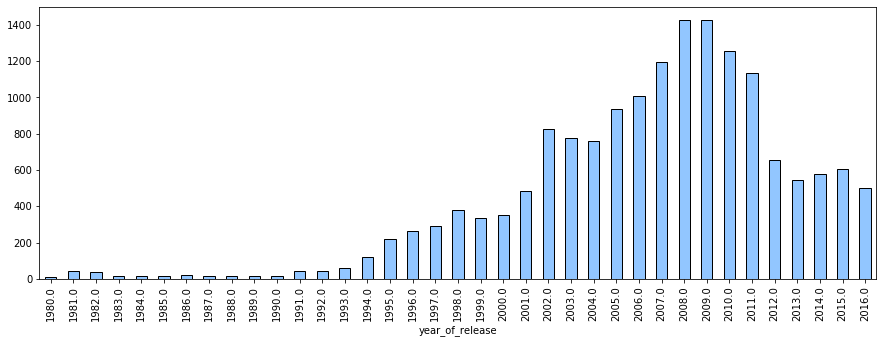

In [16]:
create_any_bar('year_of_release', 'count')

До 1994 года и Pentium 1 игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

<br/><a name="3.3."></a>
<b>3.3. Количество выпущенных игр по платформам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим на то, сколько игр выпускалось на каждую платформу за весь анализируемый период:

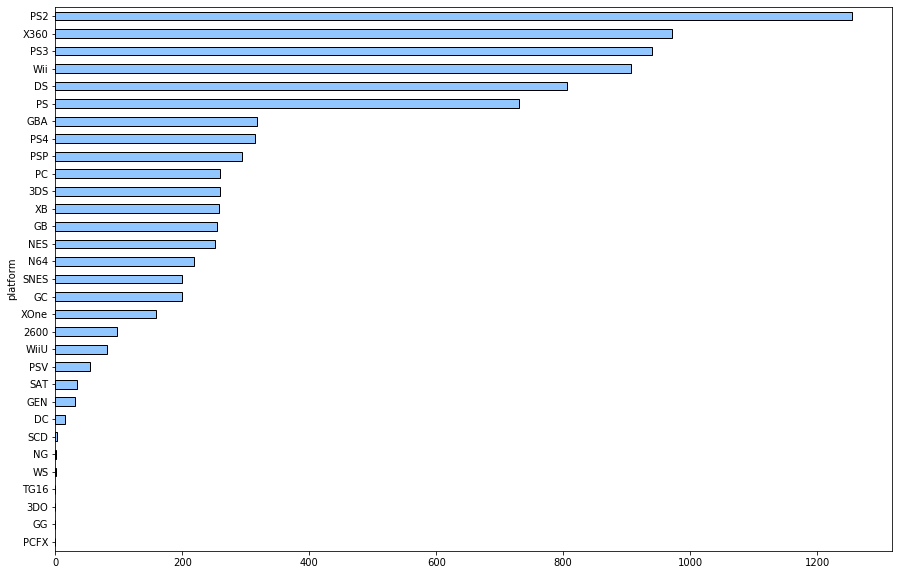

In [17]:
create_any_bar('platform', 'sum', 'sales_total')

Безусловным лидером является платформа <b>PS2</b>. Ожидаемо, она у всех давно на слуху. Каждый играл на ней, как минимум, в детстве.<br/>
Далее идут <b>Xbox360</b>, <b>PS3</b> и <b>Wii</b>.<br/>
Самые редкие платформы - представители японских технологий.

<br/><a name="3.4."></a>
<b>3.4. Динамика продаж игр по платформам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

Для возможности понимания, какой платформе какой график принадлежит, воспользуемся модулем mplcursors

In [18]:
!pip install mplcursors

Импортируем нашу новую библиотеку:

In [19]:
import mplcursors

<br/><a name="3.4.1."></a>
<b>3.4.1. Функция для прорисовки графиков line create_any_lines:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [20]:
def create_any_lines(platforms=None, query=None):
    %matplotlib notebook
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('platform == @platform')
        else:
            df_to_plot = games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(10,5))
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

<br/><a name="3.4.2."></a>
<b>3.4.2. График динамики продаж по годам по каждой платформе.</b></br><br/>
<font size="2">([к содержанию](#0.0))</font>

<b>Для удобства при наведении на график отображается платформа, которой этот график "принадлежит"):</b>

<IPython.core.display.Javascript object>


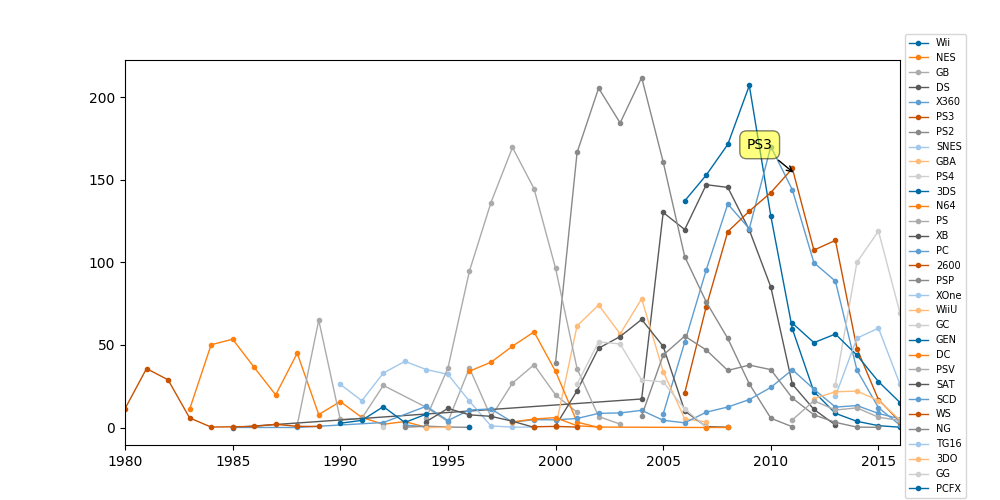

In [21]:
create_any_lines()

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период:

In [65]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

sales_total
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52

Выберем топ 6 (а не топ 5, т.к. всё-таки <b>PS</b> надо взять в разработку, да и топ-6 близок к топ-5, а вот между топ-6 и топ-7 уже пропасть по выручке):

In [22]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

<br/><a name="3.4.3."></a>
<b>3.4.3. График динамики продаж по годам по топ-6 платформ:</b></br><br/>
<font size="2">([к содержанию](#0.0))</font>

<IPython.core.display.Javascript object>


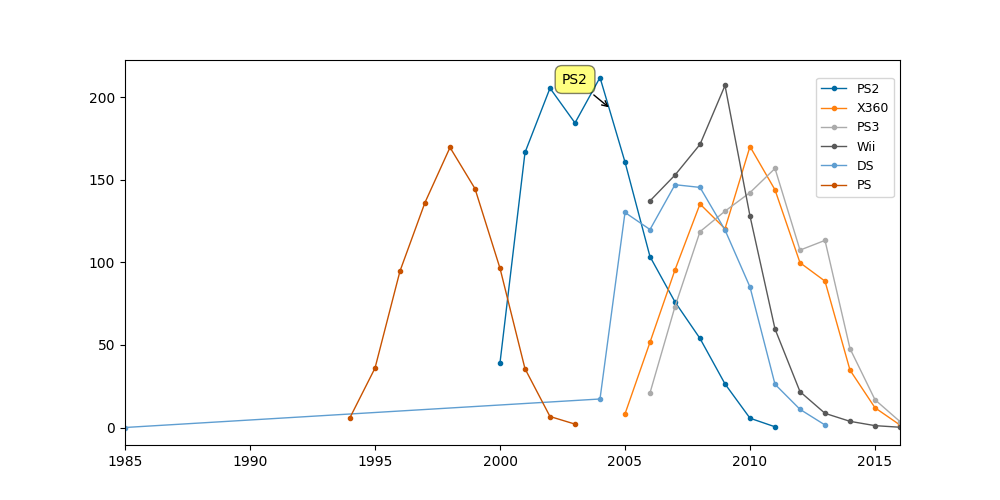

In [23]:
create_any_lines(platforms=top_platforms)

Посмотрим, сколько "живут" консоли.<br/>
* PS - прожила с 1994 года до 2003, почти 10 лет;
* PS2 - с 2000 до 2011 года - 11 лет;
* PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4;
* DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
* Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет.

Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

<br/><a name="3.5."></a>
<b>3.5. Динамика продаж игр в наше время</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.<br/><br/>На мой взгляд, актуальным периодомявляется период с 2005 по 2016 год:<br/>
* это год, когда вышли или вот-вот выйдут все популярные консоли;
* в этом периоде представлены данные по абсолютно всем самым популярным консолям.

Предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:<br/>
Какие платформы лидируют по продажам, растут или падают?<br/><br/>
На основании полученных данных выберем несколько потенциально прибыльных платформ.

<IPython.core.display.Javascript object>


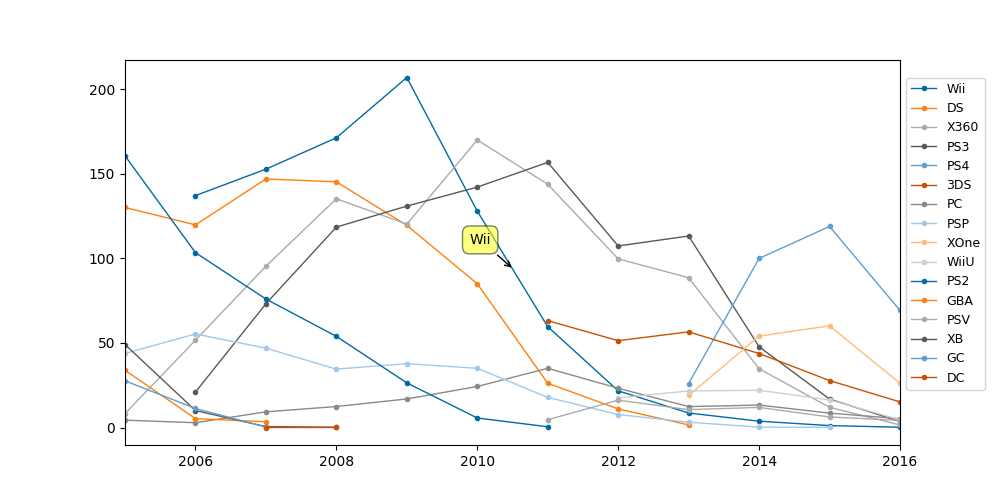

In [24]:
create_any_lines(query='year_of_release >= 2005')

На конец 2016 года лидируют по продажам следующие платформы:
* <b>PS4</b>;
* <b>Xone</b>;
* <b>3DS</b>.

Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

<br/><a name="3.6."></a>
<b>3.6. Boxplot по глобальным продажам игр и с разбивкой по платформам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах и в средних продажах на разных платформах. Опишем результат.

<br/><a name="3.6.1."></a>
<b>3.6.1. Функция для прорисовки boxplot create_any_sales_boxplot</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

In [25]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

<br/><a name="3.6.2."></a>
<b>3.6.2. Boxplot по глобальным продажам игр</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

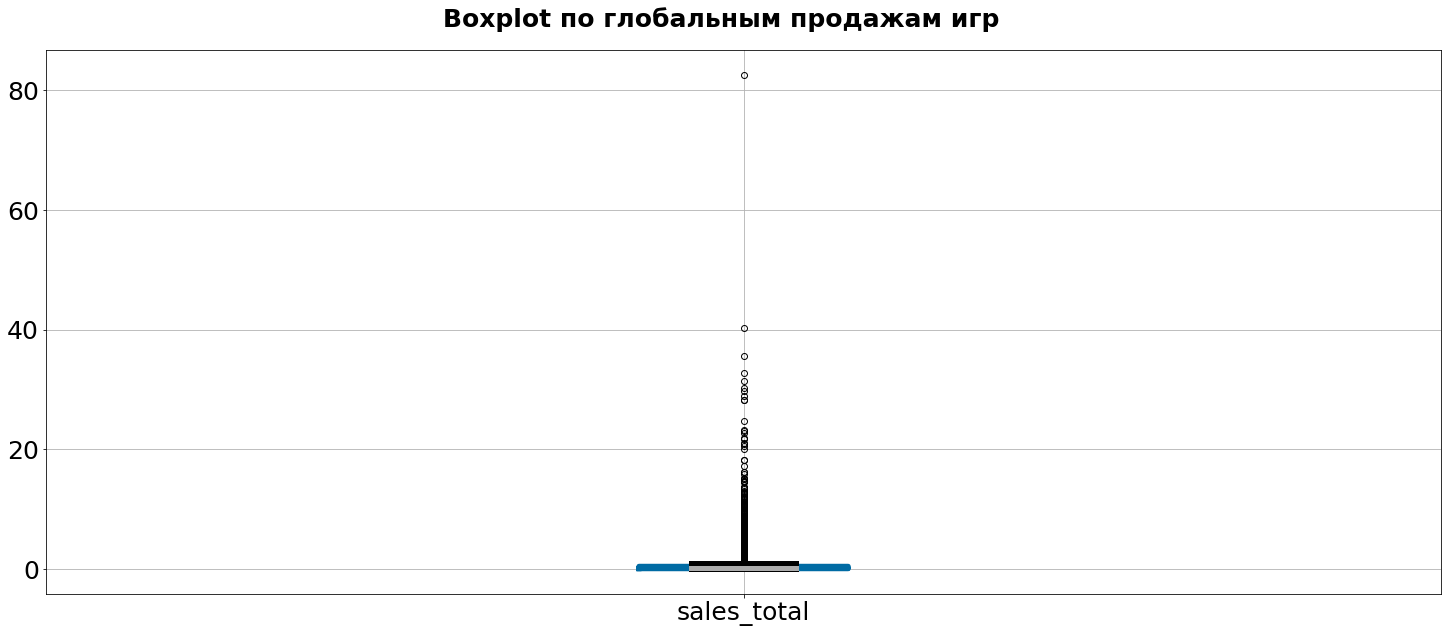

In [26]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр')

Посмотрим ближе:

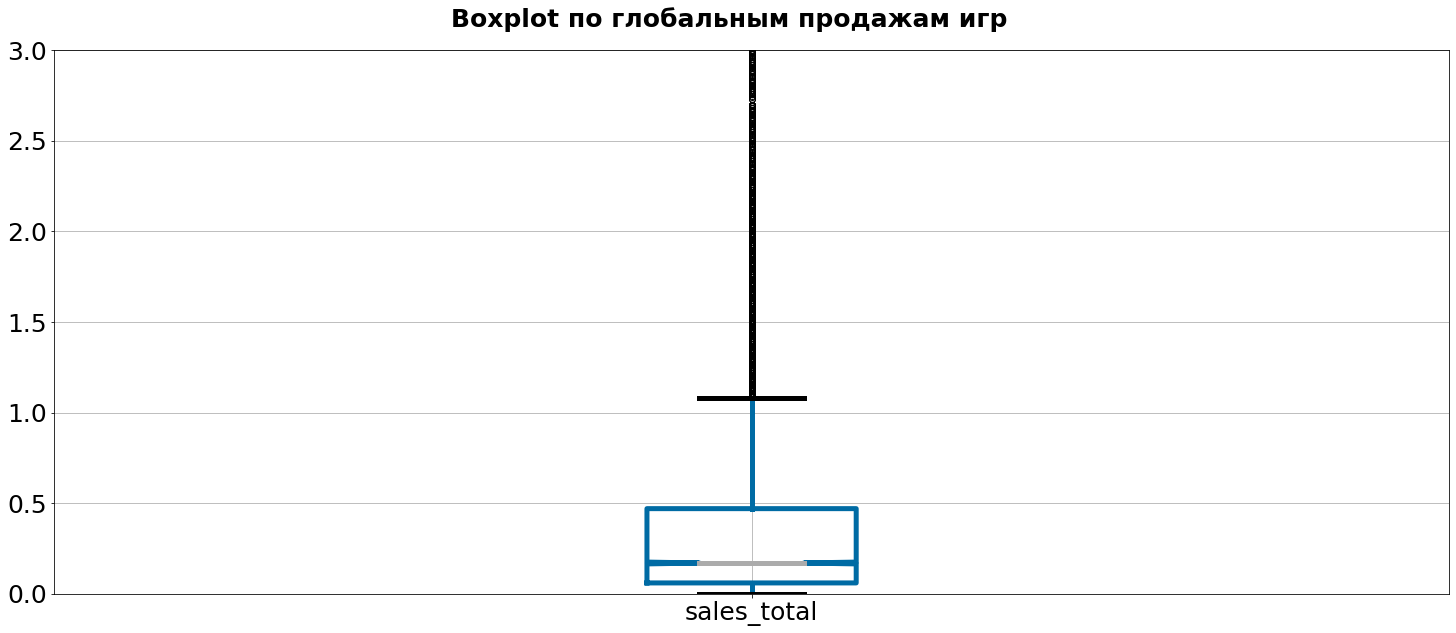

In [27]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. Не сказать, что это много.

<br/><a name="3.6.3."></a>
<b>3.6.3. Boxplot по наиболее популярным на конец 2016 года платформам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

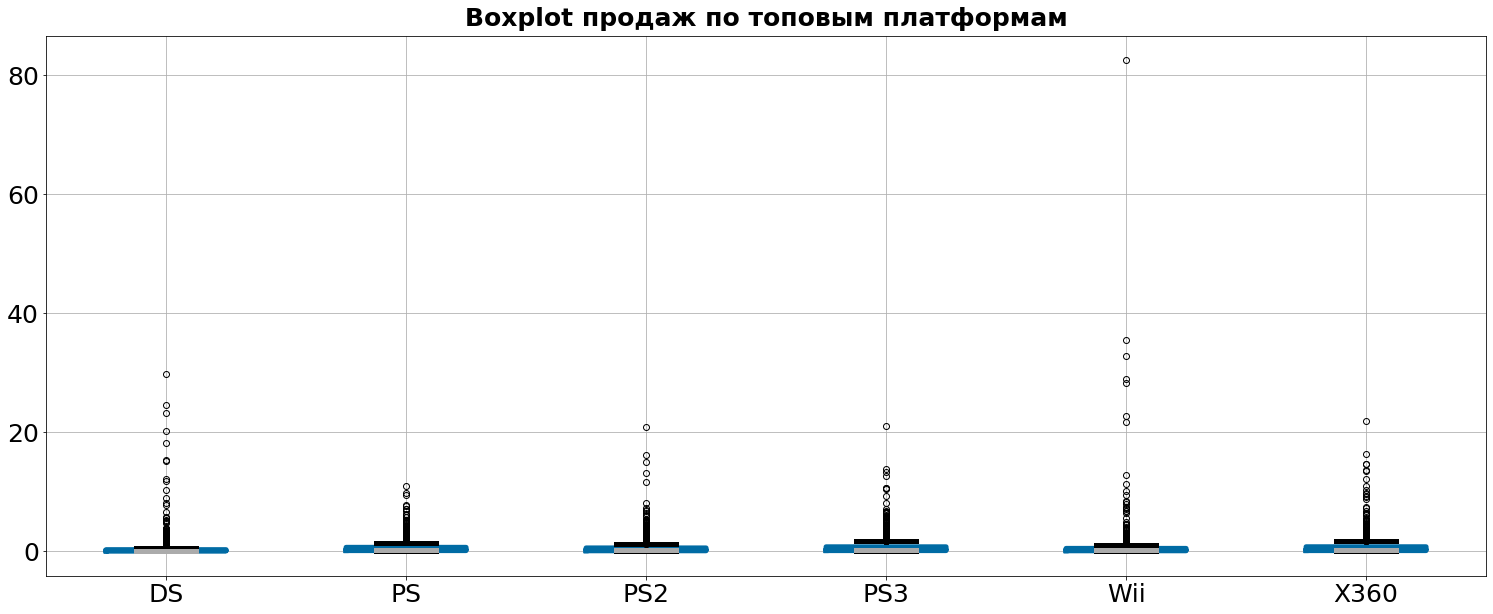

In [28]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms")

Посмотрим ближе:

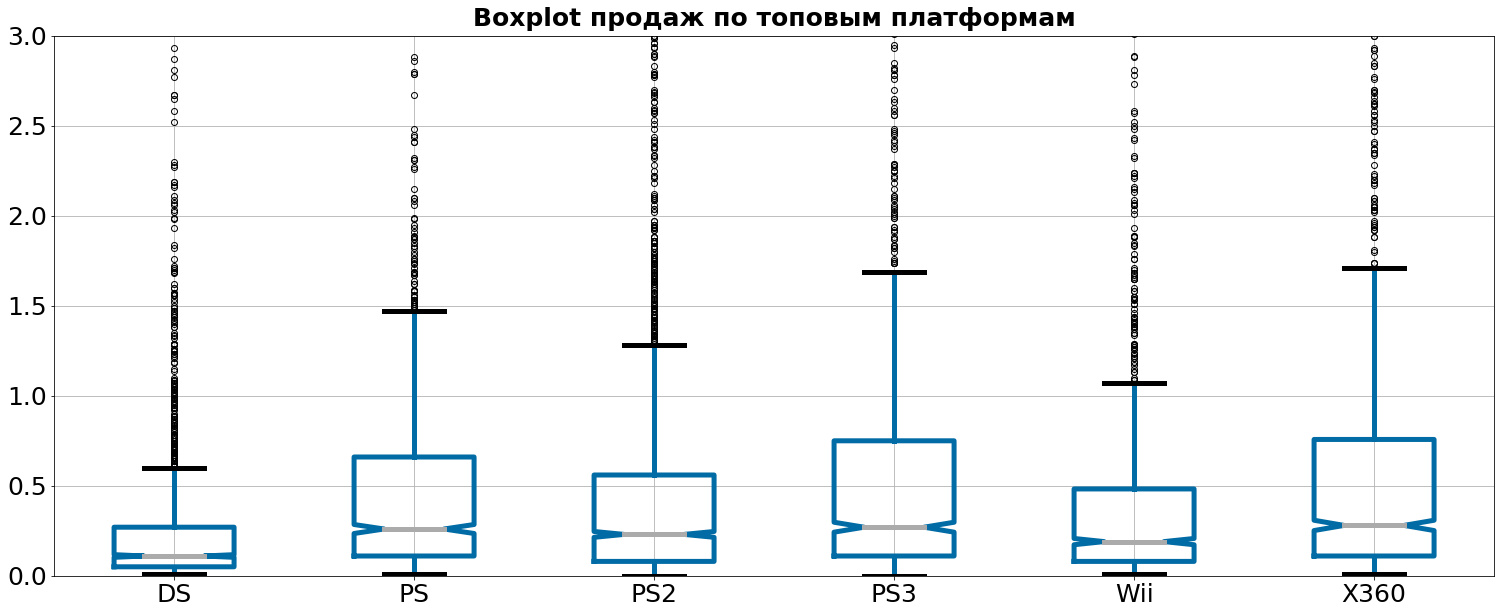

In [29]:
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.<br/>
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.<br/>
У остальных - от 1 до 1,5 миллионов долларов.<br/>
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн. 

<br/><a name="3.7."></a>
<b>3.7. Влияние отзывов пользователей и критиков на продажи</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

За образец возьмем PS3 - она давно на рынке, по ней много данных, при этом даже на конец 2016 года она является одной из самых популярных игровых платформ.

In [30]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()

<br/><a name="3.7.1."></a>
<b>3.7.1. Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

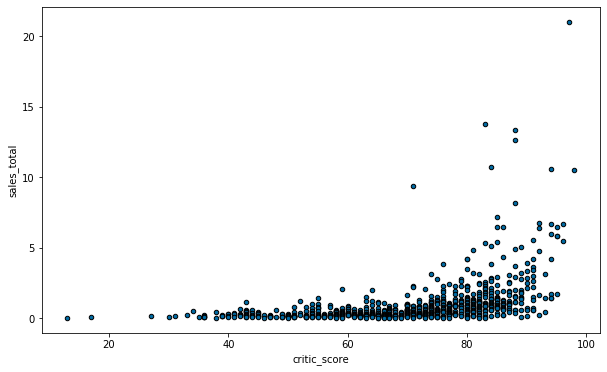

In [31]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(10,6))

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Теперь от отзывов пользователей:

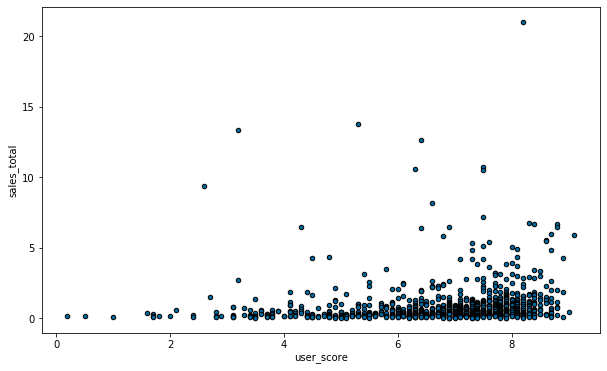

In [32]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(10,6))

Точно такая же картина, правда так называемых выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. В пример могу привести те же последние игры серии Need for Speed, когда все покупают игру, принося разработчикам прибыль, а потом расстраиваются, увидев, какая эта игра, и ставят ей довольное средние оценки.

<br/><a name="3.7.2."></a>
<b>3.7.2. Матрица корреляции</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

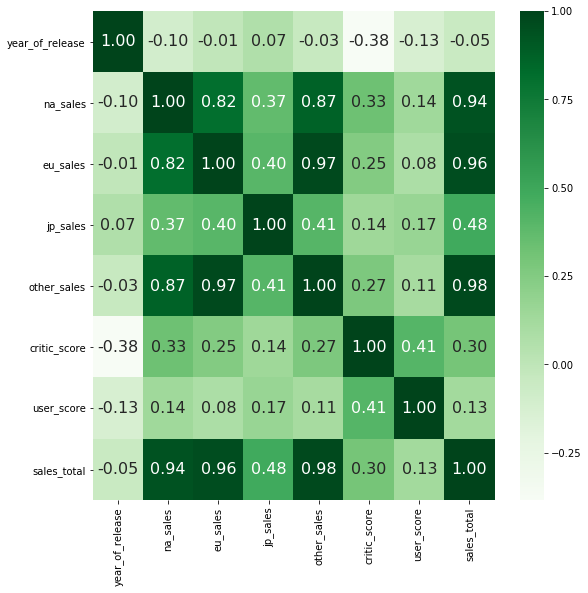

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

Выделим нужные нам данные:

In [34]:
games_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]

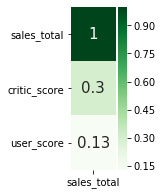

In [35]:
plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Сильнее всего на конечную стоимость влияет оценка критиков. Сильнее меньше, практически не влияет - оценка пользователей.

<br/><a name="3.7.3."></a>
<b>3.7.3. Данные по корреляции по топовым платформам:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

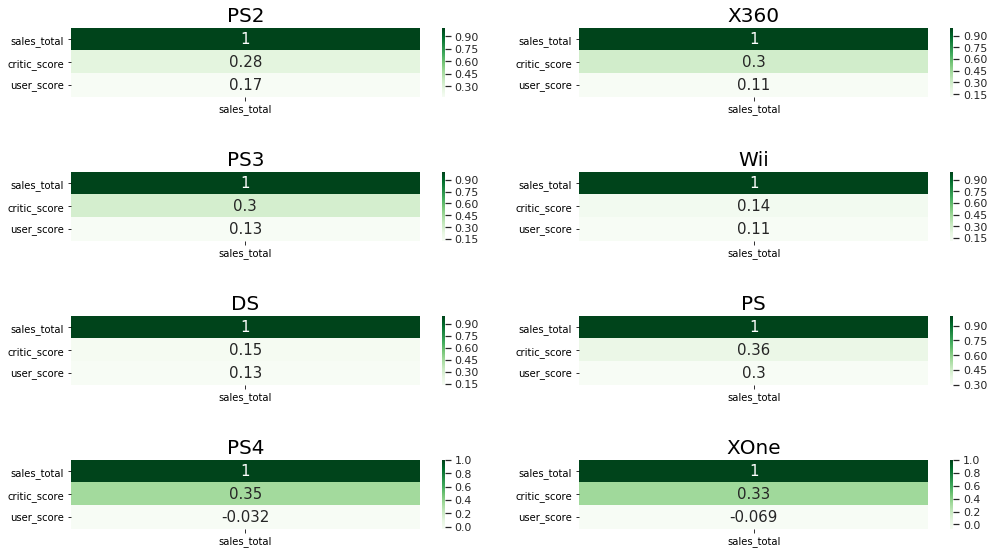

In [36]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой по платформам <b>PS2, X360, PS3, PS</b> и <b>XOne</b> более или менее совпадает с общими данными по датафрейму.<br/>
Выделяются <b>Wii</b> и <b>DS</b>, по которым зависимость не такая большая.<br/>
Кстати, есть платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы <b>DS, PS4</b> и <b>Xone</b>. В случае с <b>DS</b> полагаю, что дело в том, что приставка азиатская, большую популярность она имеет там, соответственно, далеко не большая часть игроков принимает участие в оценке игр на эту платформу. Про <b>PS4</b> и <b>Xone</b> - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

<br/><a name="3.8."></a>
<b>3.8. Распределение игр по жанрам</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Нарисуем столбчатую диаграмму с количеством и общей суммой продаж и расскажем о самых прибыльных жанрах, а потом посмотрим на особенности жанров с высокими и низкими продажами.

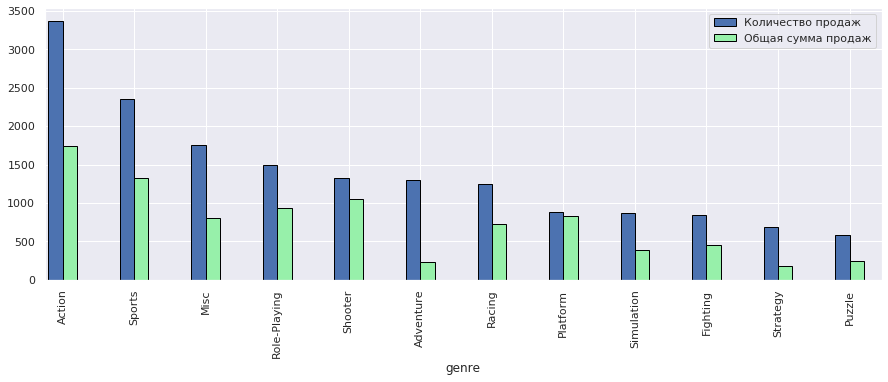

In [37]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Больше всего игр жанра <b>Action</b>. За ними идут игры спортивного жанра. Причем даже учитывая то, что игр жанра "Спорт" заметно меньше на рынке (на треть от <b>Action</b>), выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, в среднем, стоят дороже, чем шутеры. Ну и это ожидаемо, шутеры выходят преимущественно на ПК, тогда как спортивные игры - на консолях. А там явно и дела с пиратством лучше обстоят, да и сами лицензионные копии дороже.<br/><br/>


Опишем отдельно топ по количеству продаж и топ по сумме выручки.<br/><br/>

<b>Количество проданных копий:</b>
1. <b>Action</b>
2. <b>Спортивный жанр</b>
3. Игры "смешанного" жанра - <b>Miscellaneous</b>

...<b>аутсайдеры</b> - игры, которые требуют усидчивости:<br/><br/>
-1. Паззлы.<br/>
-2. Стратегии.<br/><br/>

<b>Сумма выручки:</b>
1. <b>Action</b>
2. <b>Спортивный жанр</b>
3. <b>Шутеры</b>

...<b>аутсайдеры</b> почти те же герои:<br/>
-1. Стратегии.<br/>
-2. Приключенские игры (удивительно).<br/>
-3. Паззлы.

<hr style="border: 1px solid #000;">

<br/><a name="4."></a>
## 4. Портрет пользователя регионов NA, EU, JP
<font size="2">([к содержанию](#0.0))</font>

Определим для пользователя каждого региона (NA, EU, JP):
* самые популярные платформы (топ-5), опишем различия в долях продаж;
* самые популярные жанры (топ-5), поясним разницу;
* определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

<br/><a name="4.1."></a>
<b>4.1. Функция для прорисовки графиков top_in_regions_plot:</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

In [38]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': None, 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

<br/><a name="4.2."></a>
<b>4.2. Определение самых популярных платформ в заданных регионах:</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

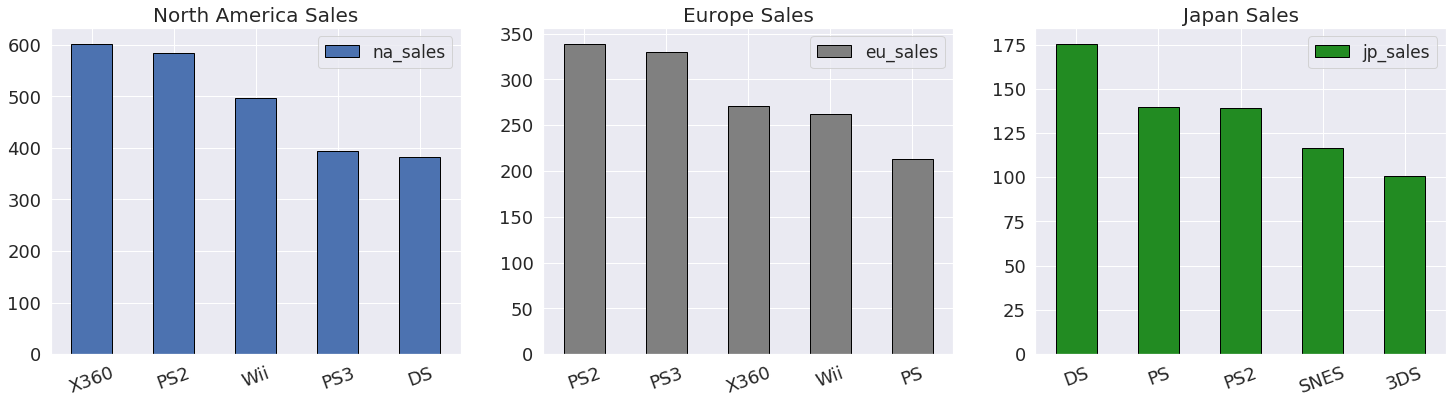

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В <b>Северной Америке</b> имеют(имели) бешеную популярность приставки прошлого поколения <b>X360</b> и <b>PS2</b>. Немного отстает <b>Wii</b>. Топ-4 и топ-5 - <b>PS3</b> и <b>DS</b> соответственно.<br/><br/>
В <b>Европе</b> одинаково (были) популярны <b>PS2</b> и <b>PS3</b>. За ними <b>X360</b>, <b>Wii</b> и <b>PS</b>.<br/><br/>
В <b>Японии</b>, как обычно, всё наоборот. Лидер - <b>DS</b>. За ними американские <b>PS и <b>PS2</b>. Далее чисто японские <b>SNES и <b>3DS</b>.

<br/><a name="4.3."></a>
<b>4.3. Определение самых популярных жанров в заданных регионах:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

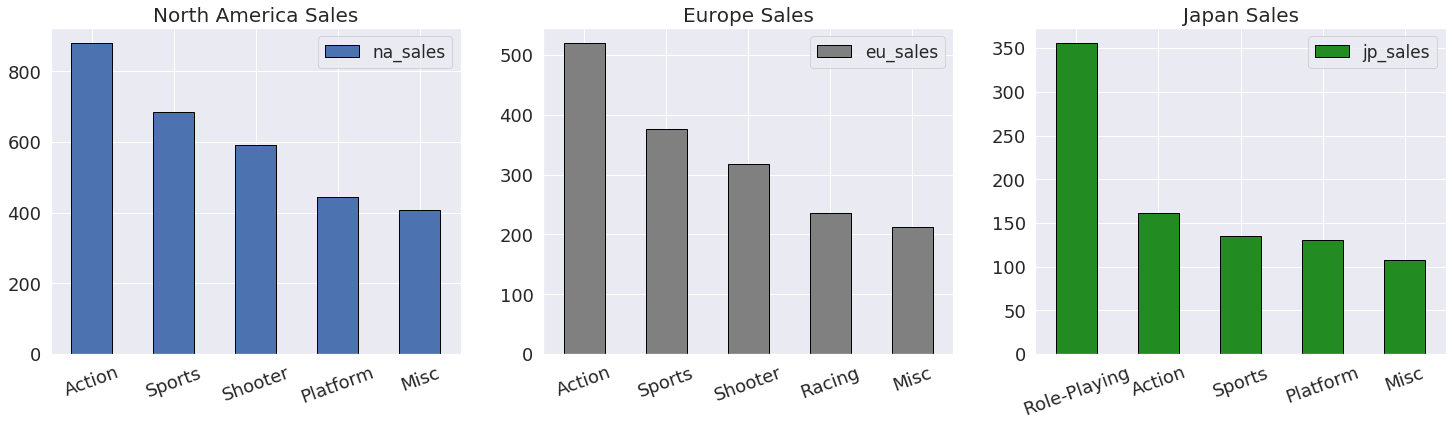

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вкусы в <b>Северной Америке</b> и <b>Европе</b> схожи: и там, и там живут фанаты <b>экшнов</b>, <b>спортивных игр</b> и <b>шутеров</b>. В <b> Северной Америке</b> больше играют в <b>платформеры</b>, в Европе же чаще выбирают <b>гонки</b>.<br/><br/>

В <b>Японии</b> вкус совершенно иной - на первом месте <b>ролевые игры</b>, причем с большим отрывом. Далее <b>экшны</b> и <b>спортивные игры</b>.

<br/><a name="4.4."></a>
<b>4.4. Влияние рейтинга ESRB на продажи в отдельном регионе</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает:

In [41]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}

In [42]:
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

Посмотрим на продажи игр по рейтингу:

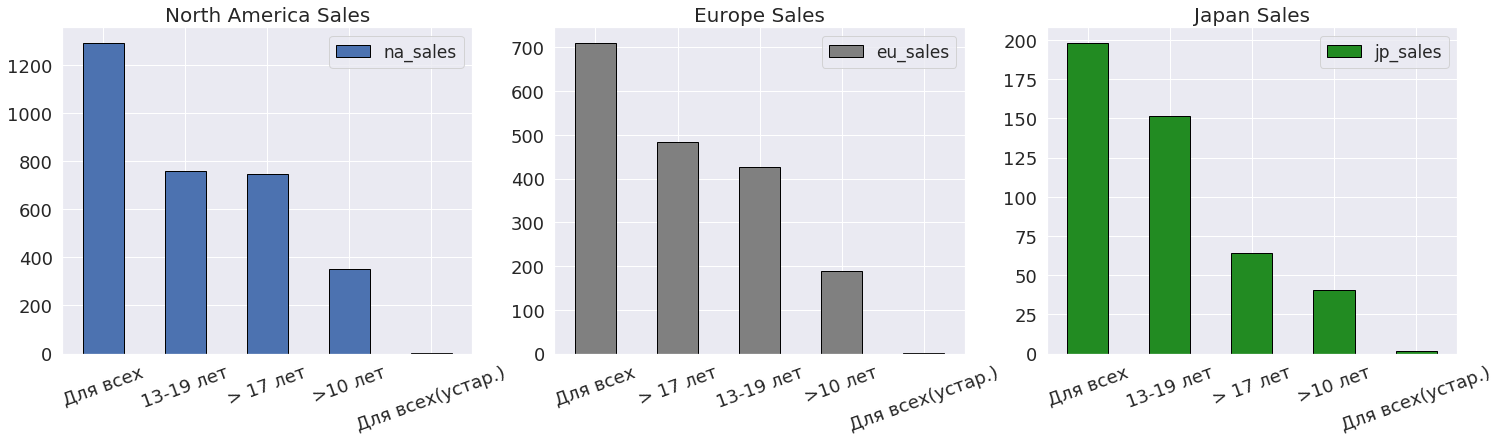

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В <b>Северной Америке</b> и в <b>Европе</b> картина практически одинаковая. Большая часть выручки получено с игр с рейтингом <b>"Для всех"</b>, поровну - с рейтингом <b>"13-19 лет"</b> и <b>"для лиц старше 17 лет"</b>.<br/><br/>
В <b>Японии</b> опять не так. Первое место такое же - <b>"Для всех"</b>, а вот на втором - игры для лиц <b>от 13 до 19 лет</b>. Да, там играют с раннего детства.

<hr style="border: 1px solid #000;">

<br/><a name="5."></a>
## 5. Проверка гипотез
<font size="2">([к содержанию](#0.0))</font>

<font size="3"><b>Гипотезы</b>:</font>
* средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> одинаковые;
* средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> разные.

Для проверки обеих гипотез будем использовать <b>t-критерий Стьюдента</b>, т.к. в обоих случаях выборки независимы между собой.<br/>
Определим пороговое значение alpha = 0.05

<br/><a name="5.1."></a>
<b>5.1. Гипотеза № 1</b>:<br/>
<b>средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>.
<font size="2">([к содержанию](#0.0))</font>

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> одинаковые.<br/>
<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> отличаются между собой.

In [44]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          -1.0        -1.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          -1.0        -1.0    NaN   

   sales_total ESRB_description  
0        82.54         Для всех  
1        40.24              NaN  
2        35.52         Для всех  
3        32.77         Для всех  
4        31.38              NaN

In [45]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


Смело отклоняем нулевую гипотезу.<br/>
Верно следующее утверждение: <b>средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.</b><br/><br/>
Посмотрим в чью пользу:

In [46]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 7.06


Компьютерные игры получают оценки статистически значимо выше, чем игры для <b>Xbox One</b>. Неудивительно, <b>Xbox One</b> такого натерпелся в последнее время. Не зря у <b>Microsoft</b> осталась всего пара эксклюзивов - всё остальное ушло на <b>PlayStation</b>.

<br/><a name="5.2."></a>
<b>5.2. Гипотеза № 2</b>:<br/>
<b>средние пользовательские рейтинги жанров Action и Sports разные</b>.<br/>
<font size="2">([к содержанию](#0.0))</font>

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> одинаковые.<br/>
<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> отличаются между собой.

In [47]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.6259419280500857
p-value = 0.1041

Пороговое значение alpha = 0.05


Не можем отвергнуть нулевую гипотезу.<br/>
Таким образом, остается верным утверждение, что <b>средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> одинаковые</b>.

<hr style="border: 1px solid #000;">

<br/><a name="6."></a>
## 6. Общий вывод
<font size="2">([к содержанию](#0.0))</font>

<b>По проведенному анализу:</b> самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким "влиянием" на выручку похвастаться не могут. Необходимо копать в эту сторону.

<b>В целом про положение дел в игровой индустрии:</b> рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.<br/><br/>
В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - нынче не ценится.<br/>
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать, потому что тенденции к изменению ценностей на те, которые были всего с десяток лет назад, нет.